# Telco Clustering📈& Churn Prediction

# Columns Decription

# Import Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re

In [3]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exploring data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5994,9661-ACXBS,Female,0,No,No,42,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.20,4400.75,Yes
3309,6061-PQHMK,Female,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.5,No
4947,4735-ASGMA,Male,0,No,No,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.35,2515.3,Yes
2152,0248-IPDFW,Female,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.10,50.1,No
3962,8972-HJWNV,Female,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,646.85,Yes
5414,2722-VOJQL,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.65,6903.1,Yes
855,2382-BCKQJ,Female,0,No,Yes,62,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,100.15,6413.65,Yes
6037,7537-CBQUZ,Male,1,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.40,7031.45,No
4889,9746-MDMBK,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.45,5317.8,No
4405,8417-FMLZI,Male,0,Yes,Yes,6,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),83.55,477.55,Yes


In [10]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#drop customerID
df.drop(columns='customerID', inplace= True)

In [12]:
df.duplicated().sum()

22

In [14]:
df.drop_duplicates(inplace=True)

# Dealing with missing values

In [15]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#df['TotalCharges']= df['TotalCharges'].astype(float)

In [16]:
TotalCharges = df['TotalCharges'].astype(str).apply(lambda x: x if not re.search('\d+', x)else 'Numeric')
TotalCharges[TotalCharges!='Numeric']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [17]:
df.drop(index=TotalCharges[TotalCharges!='Numeric'].index, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

# Data Visualization

## 1.1: Target Column (Churn)

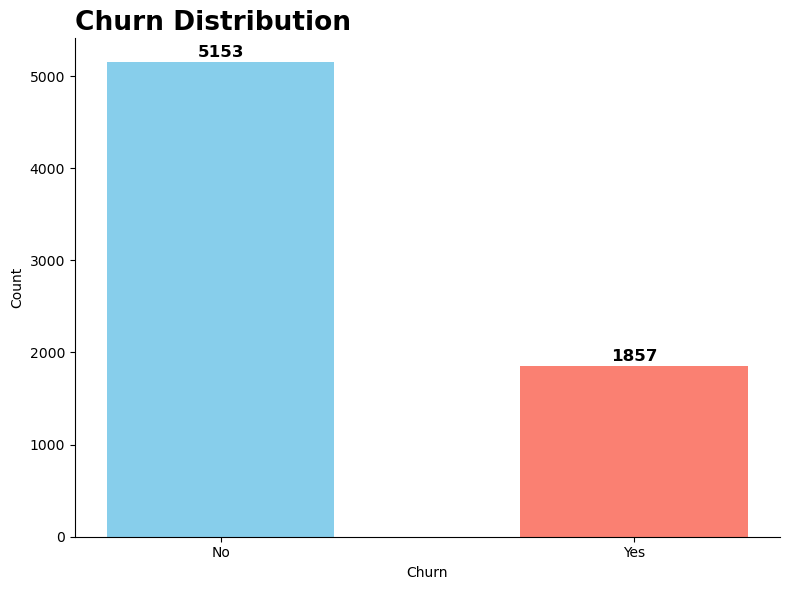

In [20]:
# Get the value counts for 'Churn' column
data_temp = df['Churn'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the bar chart
ax.bar(data_temp.index, data_temp, width=0.55, color=['skyblue', 'salmon'])

# Title and axis labels
ax.set_title('Churn Distribution', loc='left', fontsize=19, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')

# Annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')
# Hide spines on top and right sides
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

# 1.2: Churn vs Gender

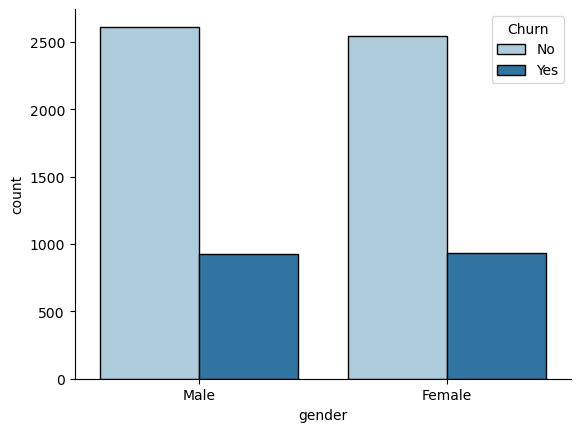

In [26]:
sns.countplot(x='gender', hue="Churn", data=df, palette="Paired",  edgecolor = 'Black', order=df['gender'].value_counts().index)
sns.despine()

# 1.3: Churn vs SeniorCitizen

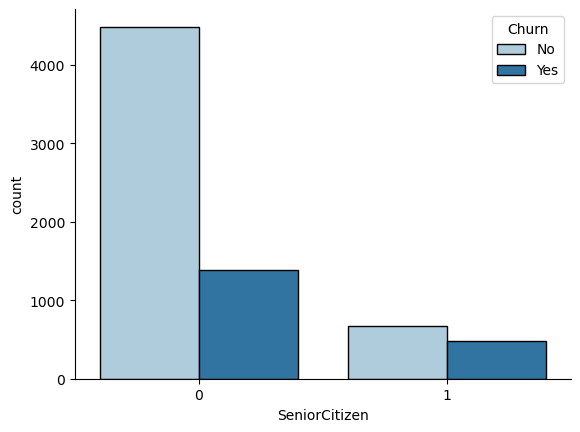

In [27]:
sns.countplot(x='SeniorCitizen', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['SeniorCitizen'].value_counts().index)
sns.despine()

In [28]:
# 1.4: Churn vs Partner

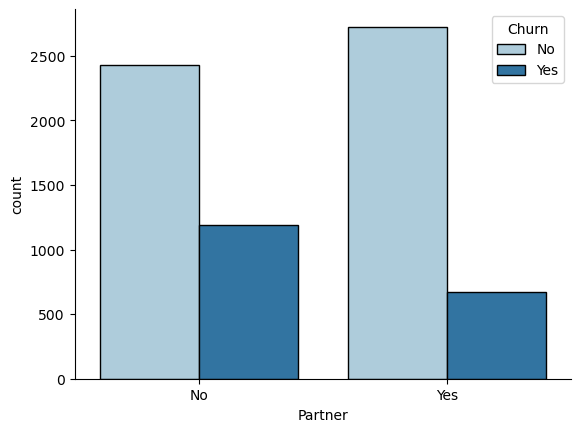

In [29]:
sns.countplot(x='Partner', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Partner'].value_counts().index)
sns.despine()

In [31]:
df['Partner'].value_counts()

Partner
No     3617
Yes    3393
Name: count, dtype: int64

# 1.5: Churn vs Dependents

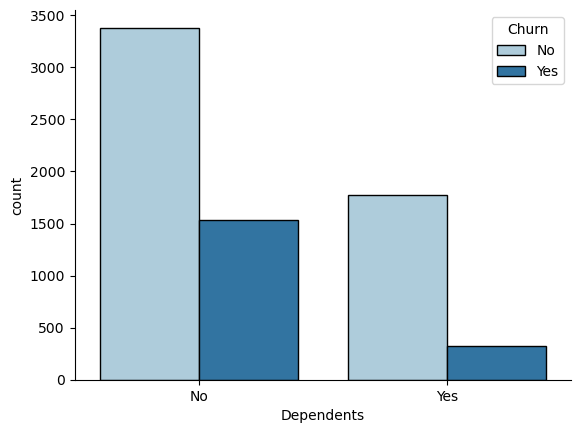

In [32]:
sns.countplot(x='Dependents', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Dependents'].value_counts().index)
sns.despine()

In [ ]:
# 1.6: Churn vs Contract

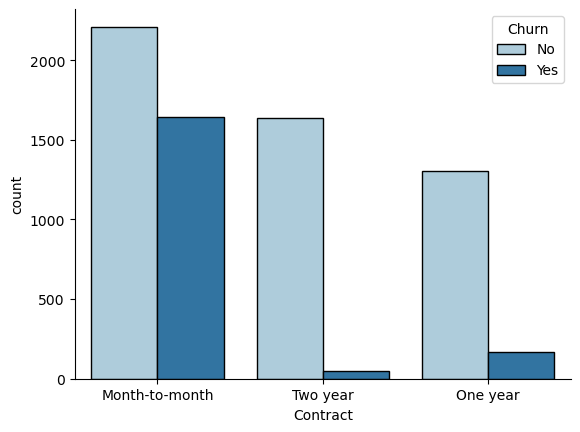

In [33]:
sns.countplot(x='Contract', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Contract'].value_counts().index)
sns.despine()

In [ ]:
# 1.7: Churn vs MonthlyCharges

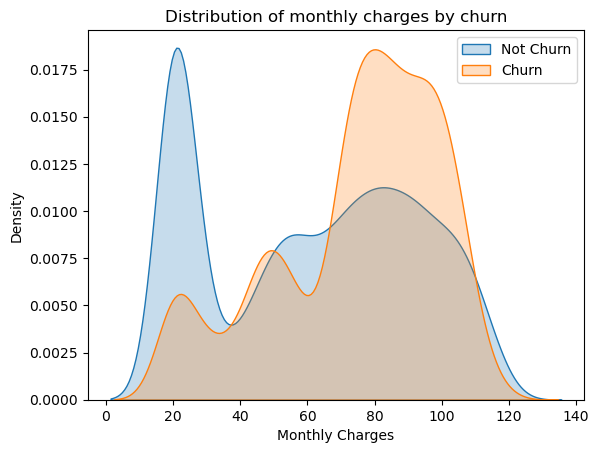

In [35]:
ax = sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 'No'], fill = True)
ax = sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 'Yes'],ax =ax, fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

# 1.8: Churn vs TotalCharges

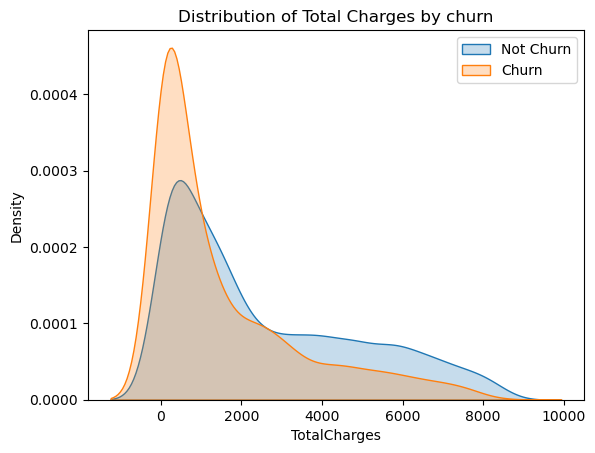

In [36]:
df['TotalCharges']= df['TotalCharges'].astype(float)

ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == 'No'], fill = True)
ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == 'Yes'],ax =ax,fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of Total Charges by churn');

# Cluster data:
 1- Preprocess and encode Categorical Data
 2- Scale Numerical Columns
 3- Apply Clustering Algorithm

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans  

cluster_df= df.copy()

numerics_columns= ['tenure', 'MonthlyCharges', 'TotalCharges']
cate_columns= [i for i in df.columns if i not in numerics_columns]

scaler = StandardScaler()
cluster_df[numerics_columns]= scaler.fit_transform(cluster_df[numerics_columns])

# Label Encoding for categorical columns
label_encoders = {}
for col in cate_columns:
    label_encoders[col] = LabelEncoder()
    cluster_df[col] = label_encoders[col].fit_transform(cluster_df[col])

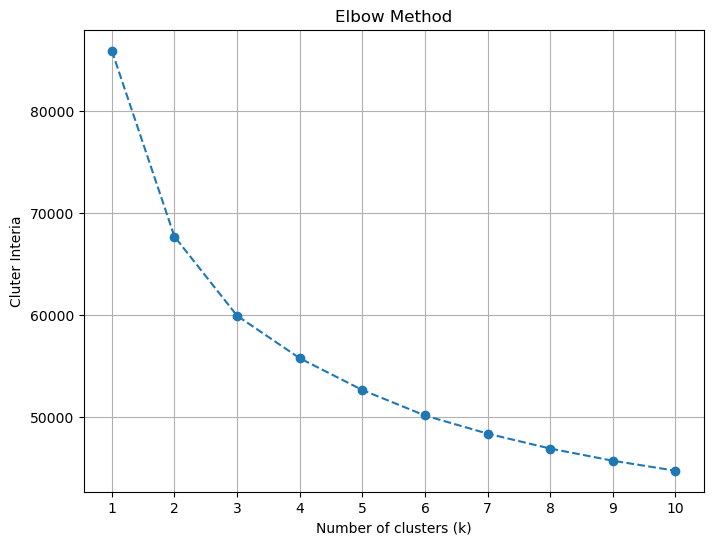

In [38]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

wcss = []  # List to store the within-cluster sum of squares

# Try different values of k from 1 to a certain number
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)  # Inertia: within-cluster sum of squares

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cluter Interia')
plt.xticks(np.arange(1, 11, 1))  # Set x-axis ticks from 1 to 10
plt.grid(True)
plt.show();

In [39]:
# K-Means cluster analysis
kmeans = KMeans(n_clusters = 4,  random_state=42)
kmeans.fit(cluster_df)
# Save cluster group as a column value in our data_frame
cluster_df['Cluster'] = kmeans.labels_

In [41]:
cluster_df.head(1).T

,0
gender,0.000000
SeniorCitizen,0.000000
Partner,1.000000
Dependents,0.000000
tenure,-1.285566
PhoneService,0.000000
MultipleLines,1.000000
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,2.000000


<function matplotlib.pyplot.show(close=None, block=None)>

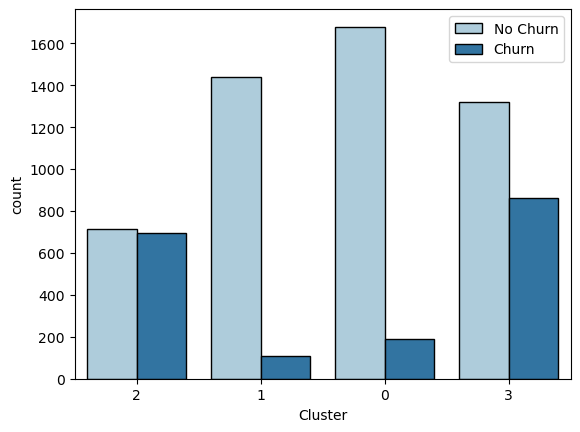

In [42]:
sns.countplot(x='Cluster', hue="Churn", data=cluster_df, palette="Paired", edgecolor = 'Black', order=cluster_df['Cluster'].value_counts(ascending=True).index)
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show

# Visualize Clusters with all cateorical columns# 

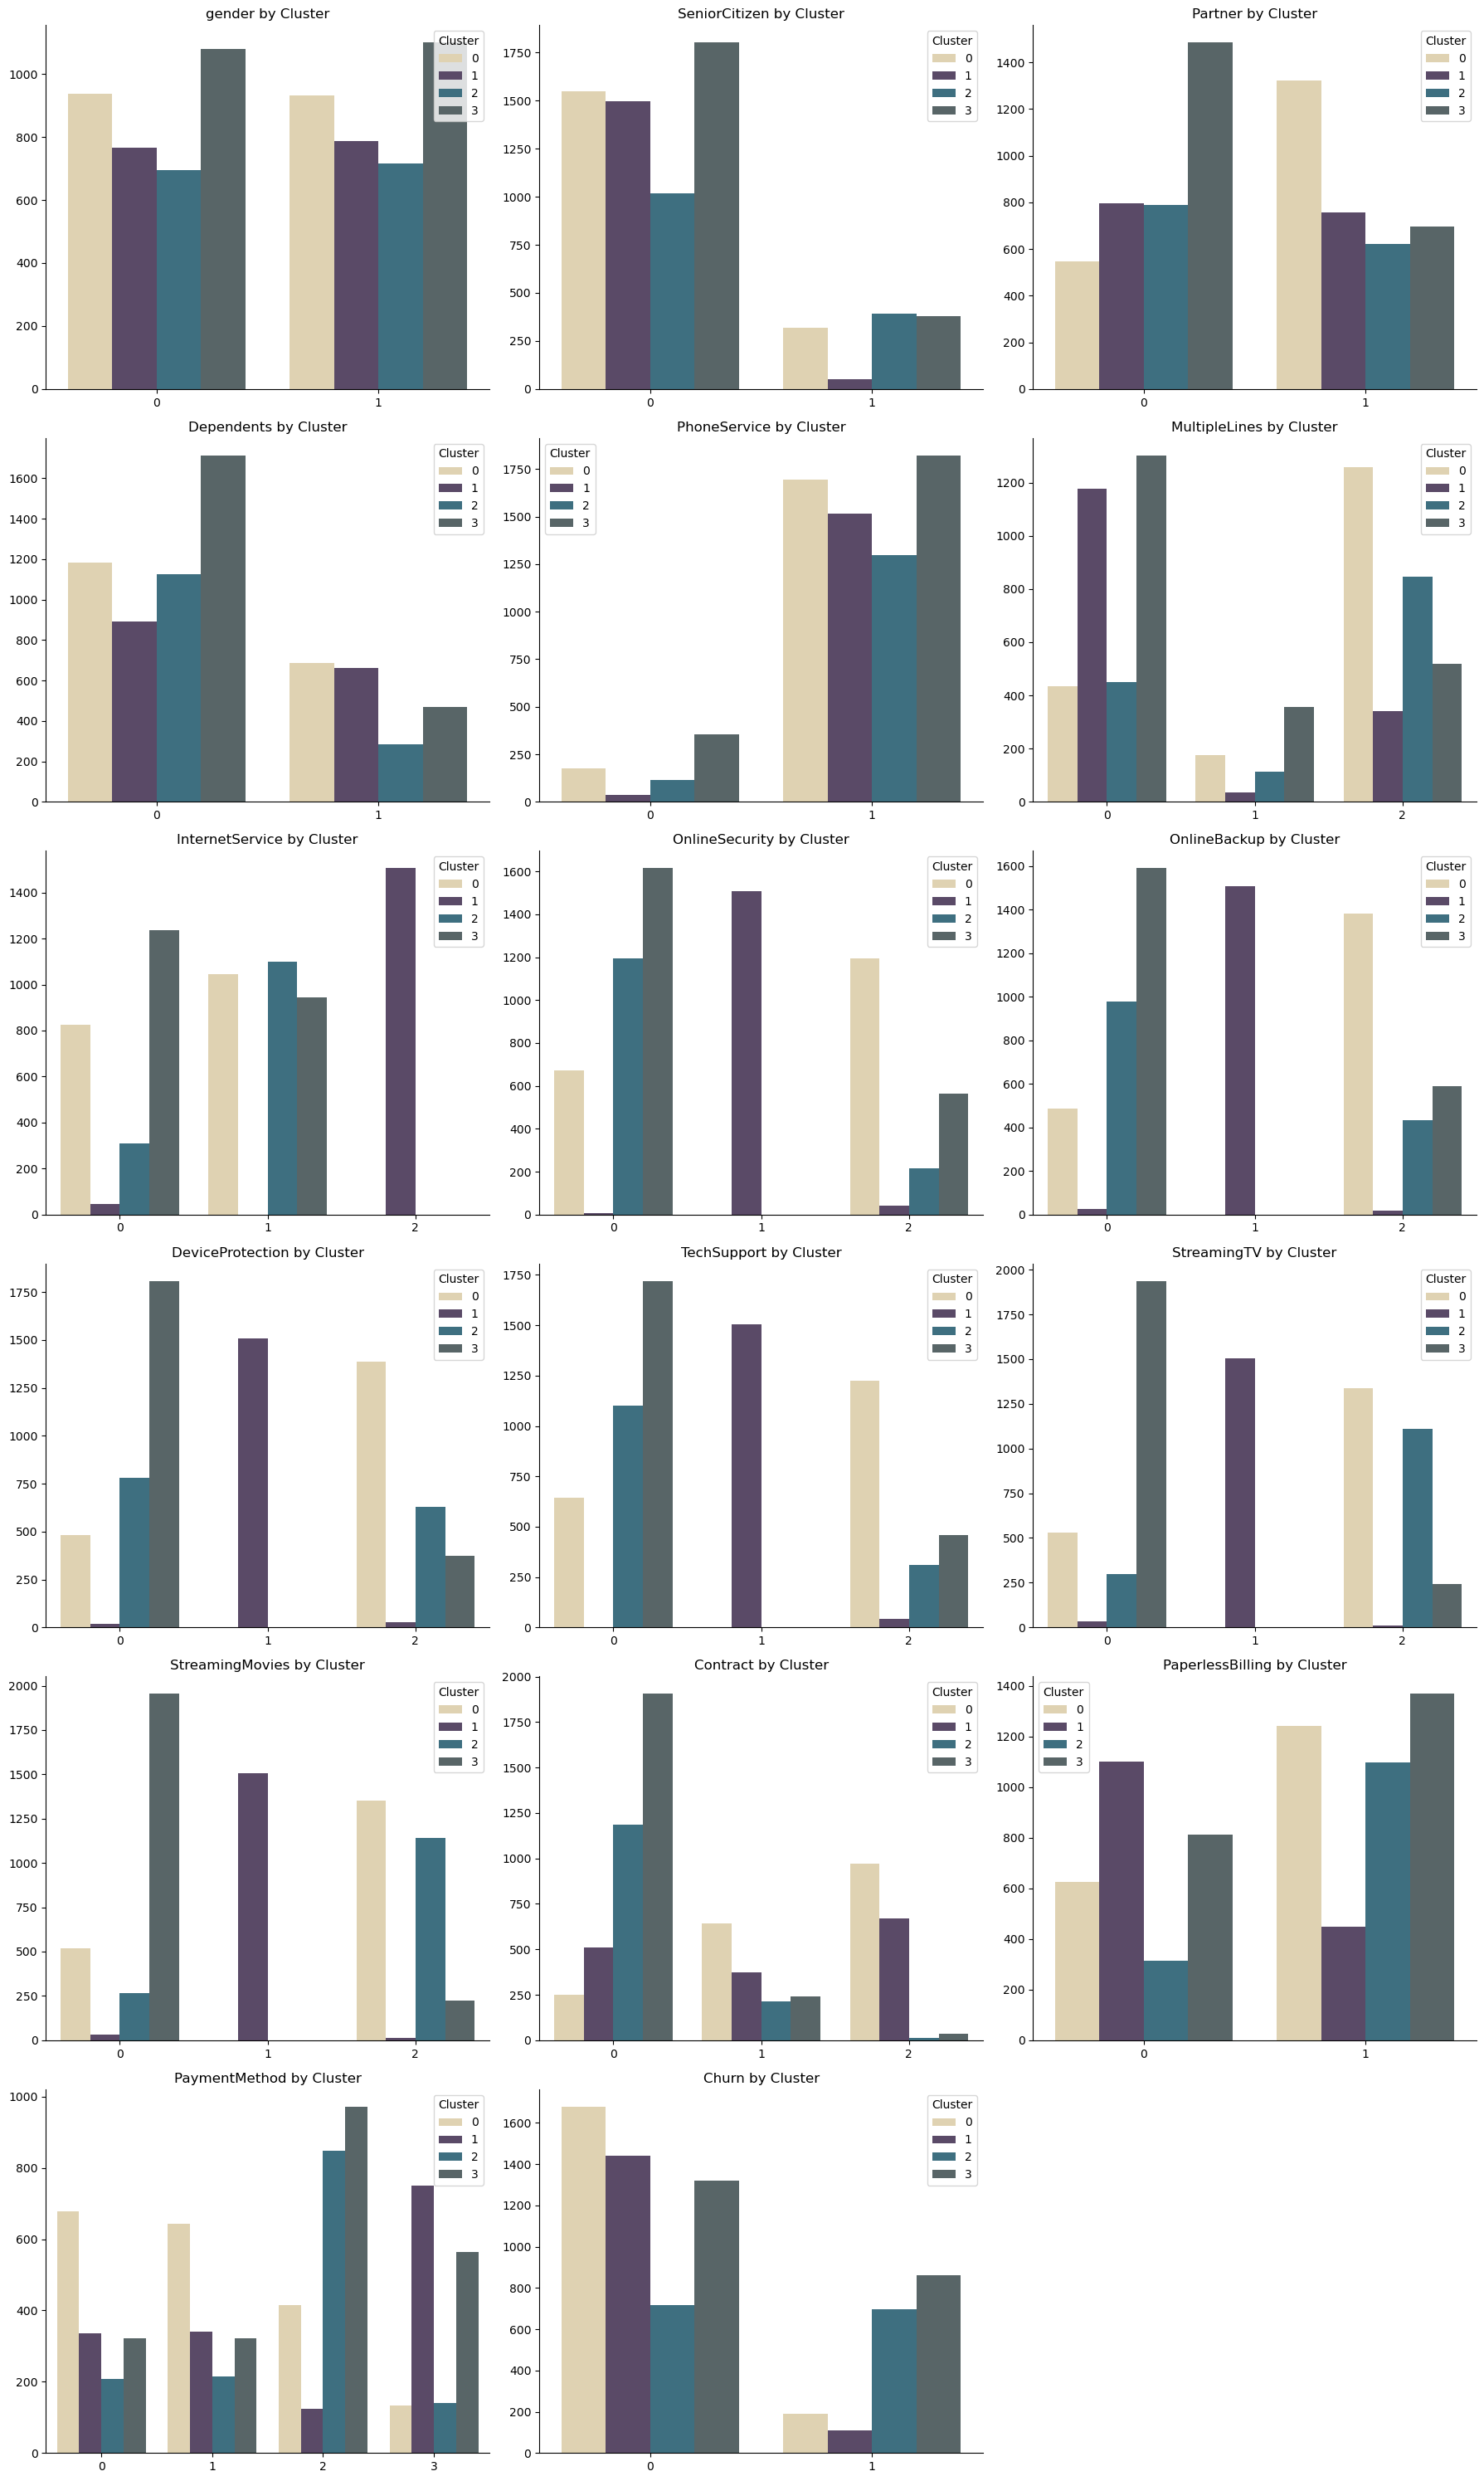

In [43]:
# Assuming cat_columns contains the names of all categorical columns except 'Cluster'
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Set the number of columns for subplot arrangement
num_cols = 3
num_rows = (len(cat_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))

# Flatten axes if needed
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Set custom color palette for better visualization
colors = ['#e6d5aa', '#5b456c', '#33748b','#566769']
sns.set_palette(sns.color_palette(colors))

# Iterate through each categorical column and create count plots against 'Cluster'
for i, column in enumerate(cat_columns):
    if i < len(axes):
        sns.countplot(x=column, hue='Cluster', data=cluster_df, ax=axes[i]).set(
            title=f'{column} by Cluster', xlabel=None, ylabel=None)
        axes[i].legend(title='Cluster')
        sns.despine()

# Hide any empty subplots
for i in range(len(cat_columns), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Visualize Clusters with all numerical columns

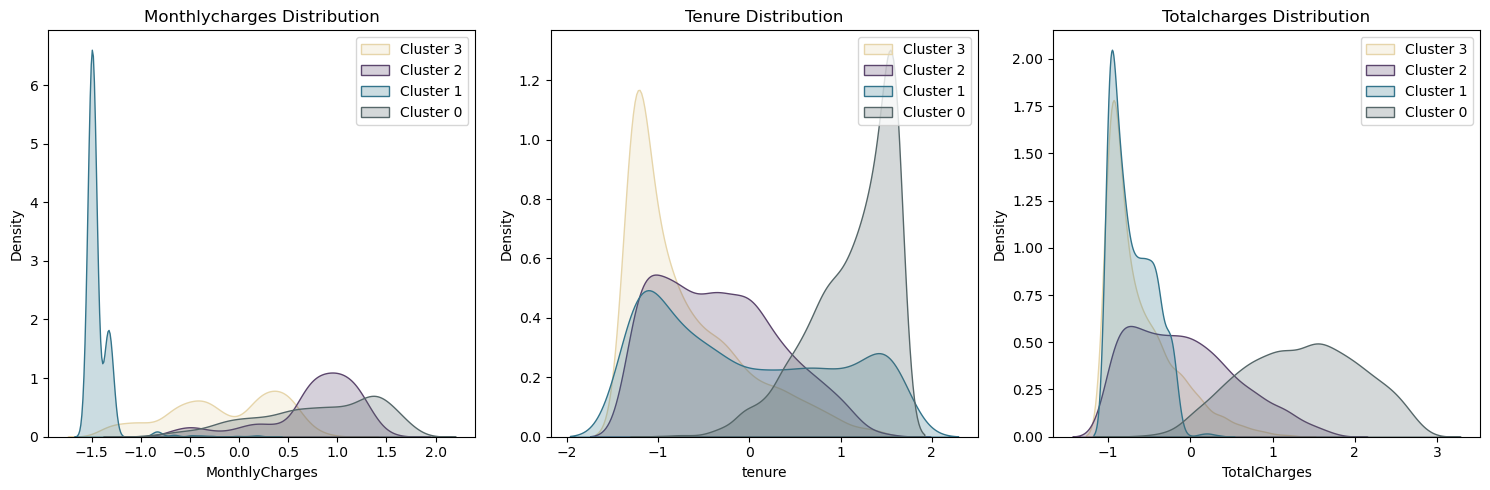

In [45]:
# Assuming num_columns contains the names of all numerical columns except 'Cluster'
num_columns = ['MonthlyCharges', 'tenure', 'TotalCharges']  # Replace this with your numerical columns
# Define a color palette for the clusters
# Replace 'color_palette' with the color names or hex codes you want to use for each cluster
color_palette = ['#e6d5aa', '#5b456c', '#33748b','#566769']

plt.figure(figsize=(15, 5))

for i, column in enumerate(num_columns, 1):
    plt.subplot(1, 3, i)
    for idx, cluster in enumerate(cluster_df['Cluster'].unique()):
        sns.kdeplot(cluster_df[cluster_df['Cluster'] == cluster][column],
                    label=f'Cluster {cluster}',
                    shade=True,
                    color=color_palette[idx % len(color_palette)])  # Use the defined color palette
    plt.title(f'{column.capitalize()} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Build some ML Predcition models

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

ml_df = df.copy()

numerics_columns= ['tenure', 'MonthlyCharges', 'TotalCharges']
cate_columns= [i for i in ml_df.columns if i not in numerics_columns]

scaler = StandardScaler()
ml_df[numerics_columns]= scaler.fit_transform(ml_df[numerics_columns])

# Label Encoding for categorical columns
label_encoders = {}
for col in cate_columns:
    label_encoders[col] = LabelEncoder()
    ml_df[col] = label_encoders[col].fit_transform(ml_df[col])

In [48]:
X = ml_df.drop(columns = ['Churn']) # independent valriables
y = ml_df['Churn'].values # target

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score, jaccard_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# GridSearchCV (Hyperparmater Tuning)

In [54]:
## Hyperparmater Tuning
def Prune_model(grid, model):
    gcv = GridSearchCV(estimator = model, param_grid = grid,cv = 3, n_jobs = -1)
    gcv.fit(X_train, y_train)
    print(gcv.best_params_)
    return gcv

# K-Nearest Neighbors

In [55]:
k_grid={'leaf_size': range(1,20),
        'p': [1,2],
        'n_neighbors': range(1,21,3)}
k_model = KNeighborsClassifier()
k_grid_model= Prune_model(k_grid, k_model)
k_grid_model.score(X_train, y_train),k_grid_model.score(X_test, y_test)

{'leaf_size': 1, 'n_neighbors': 16, 'p': 1}


(0.8104493580599144, 0.7831669044222539)

# DecisionTreeClassifier

In [56]:
grid = {'max_depth': [10, 20, 30, None],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [10, 20, 30]}

dt_model = DecisionTreeClassifier()
dt_grid = Prune_model(grid,dt_model)
dt_grid.score(X_train, y_train),dt_grid.score(X_test, y_test)

{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 2}


(0.8165121255349501, 0.7838801711840229)